In [6]:
# of each tissue, the mean dice score and std
# img == label

In [7]:
# csf_label_gt = label_img==1

In [31]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [26]:
def load_nifti(file_path):
    # Load the NIfTI image
    nii_image = nib.load(file_path)

    # Access the image data as a Numpy array
    data_array = nii_image.get_fdata()

    return data_array

def show_nifti(file_data):
    plt.imshow(file_data[:, :, 20], cmap='gray')  # Display a single slice (change the slice index as needed)
    plt.title('NIfTI Image')
    plt.colorbar()
    plt.show()



(240, 240, 48)


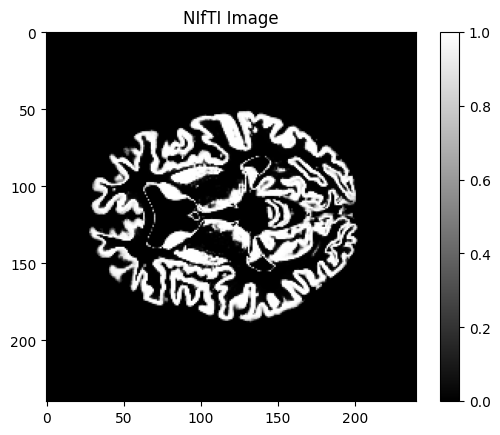

In [27]:
c1t1 = load_nifti(os.path.join(os.getcwd(), '../P2_data/1/c1T1.nii'))
print(c1t1.shape)
show_nifti(c1t1)

(240, 240, 48)


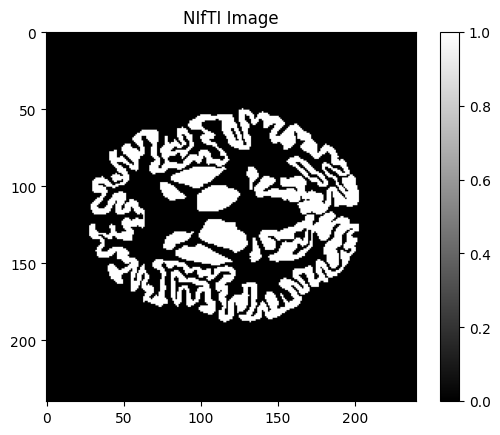

In [28]:
mt1 = load_nifti(os.path.join(os.getcwd(), '../P2_data/1/LabelsForTesting.nii'))

wm_mt1 = mt1 == 2

print(wm_mt1.shape)
show_nifti(wm_mt1)


In [29]:
def dice_coefficient(mask1, mask2):
    # Ensure the masks have the same shape
    if mask1.shape != mask2.shape:
        raise ValueError("Input masks must have the same shape.")

    # Compute the intersection and union of the masks
    intersection = np.sum(mask1 * mask2)
    union = np.sum(mask1) + np.sum(mask2)

    # Calculate the Dice coefficient
    dice = (2.0 * intersection) / (union + 1e-8)  # Add a small epsilon to avoid division by zero

    return dice


In [32]:
dice_score = dice_coefficient(mt1, c1t1)
print("Dice Score:", dice_score)


Dice Score: 0.6360492751254831
